## Zoho Management Service Machine Learning Project
***Project By : PRASAD JADHAV***

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
file_path = 'zoho_management_service_dataset_v1.csv'
df = pd.read_csv(file_path)
pd.set_option('display.max_columns',25)
print(df.shape)

(10000, 24)


In [5]:
df.head()

,Customer_ID,Customer_Sentiment_Score,Customer_Tier,Average_Response_Time,Lifetime_Purchase_Frequency,Marketing_Channel_Effectiveness,Churn_Risk_Score,Preferred_Communication_Channel,Skill_Matching_Score,Employee_Engagement_Score,Attrition_Risk,Training_Hours_Completed,Promotion_Readiness_Score,Revenue_Growth_Rate,Late_Payment_Probability,Invoice_Discrepancy_Flag,Cost_Per_Lead,Ad_Target_Audience_Reach,Return_Rate,Shipping_Cost_Efficiency,KPI_Deviation_Score,Forecast_Accuracy,Sentiment_Polarity,Fraud_Risk_Flag
0,6647,-0.16,Bronze,5.05,15,0.27,0.45,Chat,0.19,90.36,0.76,94,0.12,19.01,0.33,1,658.27,57669,0.94,2.89,-19.20,0.39,0.72,1
1,3577,-0.72,Gold,12.31,13,0.20,0.61,Chat,0.13,32.15,0.66,9,0.79,13.61,0.41,1,136.87,77145,0.86,4.72,3.01,0.11,0.63,1
2,5818,0.05,Gold,40.66,3,0.70,0.02,Social Media,0.02,69.44,0.19,29,0.22,-16.07,0.32,1,176.69,54083,0.56,4.93,-15.63,0.50,0.91,1
3,8291,0.30,Silver,14.72,38,0.27,0.09,Social Media,0.63,51.39,0.17,68,0.97,41.02,0.21,1,521.30,79845,0.25,1.59,29.57,0.84,0.85,1
4,4745,-0.06,Gold,45.04,7,0.85,0.48,Social Media,0.25,19.31,0.38,167,0.26,-5.24,0.84,1,990.67,4982,0.68,4.34,-41.69,0.55,-0.29,0


In [6]:
df.tail()

,Customer_ID,Customer_Sentiment_Score,Customer_Tier,Average_Response_Time,Lifetime_Purchase_Frequency,Marketing_Channel_Effectiveness,Churn_Risk_Score,Preferred_Communication_Channel,Skill_Matching_Score,Employee_Engagement_Score,Attrition_Risk,Training_Hours_Completed,Promotion_Readiness_Score,Revenue_Growth_Rate,Late_Payment_Probability,Invoice_Discrepancy_Flag,Cost_Per_Lead,Ad_Target_Audience_Reach,Return_Rate,Shipping_Cost_Efficiency,KPI_Deviation_Score,Forecast_Accuracy,Sentiment_Polarity,Fraud_Risk_Flag
9995,8369,0.40,Gold,12.93,40,0.19,0.90,Social Media,0.20,60.67,0.94,133,0.96,42.60,0.44,1,254.60,91333,0.30,0.30,-28.46,0.66,0.05,0
9996,5767,0.64,Gold,3.24,33,0.51,0.88,Social Media,0.25,45.28,0.61,167,0.05,-14.69,0.45,0,264.54,22969,0.96,3.01,46.45,0.05,-0.83,0
9997,8414,0.18,Gold,31.17,20,0.17,0.84,Email,0.30,76.46,0.42,3,0.70,-11.58,0.91,1,926.48,62928,0.11,1.92,21.12,0.75,-0.11,1
9998,5781,-0.90,Silver,23.87,3,0.12,0.56,Social Media,0.97,73.57,0.39,118,0.16,27.97,0.73,0,555.40,74275,0.60,4.13,2.78,0.82,0.39,1
9999,2231,0.50,Silver,46.88,40,0.71,0.53,Social Media,0.65,11.83,0.19,92,0.99,3.21,0.29,0,567.98,79255,0.85,0.24,-35.18,0.27,-0.39,0


### Dataset Structure Overview Columns:

- Customer_ID	Unique identifier for each customer.	
- Customer_Sentiment_Score	Numeric score representing customer satisfaction or sentiment.	
- Churn_Risk_Score	A score indicating the likelihood of a customer to churn.	
- Revenue_Growth_Rate	The rate of growth in revenue from the customer over a specific period.	
- Attrition_Risk	Probability or risk of a customer or employee leaving.	
- Invoice_Discrepancy_Flag	Flag indicating whether any discrepancies were found in invoices (0/1).	
- Return_Rate	Rate of product returns by the customer.	
- Preferred_Communication_Channel	The preferred mode of communication (e.g., Email, Phone, SMS).	
- Product_ID	Unique identifier for products.	
- Order_Frequency	How frequently the customer places orders (e.g., daily, weekly).	
- Average_Order_Value	Average monetary value of orders placed by the customer.	
- Customer_Lifetime_Value	Total predicted revenue from the customer over their lifetime.	
- Marketing_Spend	Amount spent on marketing for the customer.	
- Support_Tickets_Raised	Number of support tickets raised by the customer.	
- Discount_Utilization_Rate	Rate at which customers utilize available discounts.	
- Last_Interaction_Timestamp	Timestamp of the last recorded interaction with the customer.	
- Campaign_Response_Rate	Rate of response to marketing campaigns by the customer.
- Referral_Flag	Whether the customer has referred others (0/1).	
- Net_Promoter_Score	Score indicating customer loyalty and likelihood to recommend the brand.
- High_Value_Customer_Flag	Whether the customer is classified as a high-value customer (0/1).

### Data Exploration

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer_ID                      10000 non-null  int64  
 1   Customer_Sentiment_Score         10000 non-null  float64
 2   Customer_Tier                    10000 non-null  object 
 3   Average_Response_Time            10000 non-null  float64
 4   Lifetime_Purchase_Frequency      10000 non-null  int64  
 5   Marketing_Channel_Effectiveness  10000 non-null  float64
 6   Churn_Risk_Score                 10000 non-null  float64
 7   Preferred_Communication_Channel  10000 non-null  object 
 8   Skill_Matching_Score             10000 non-null  float64
 9   Employee_Engagement_Score        10000 non-null  float64
 10  Attrition_Risk                   10000 non-null  float64
 11  Training_Hours_Completed         10000 non-null  int64  
 12  Promotion_Readiness

In [7]:
df.isnull().sum()

Customer_ID                        0
Customer_Sentiment_Score           0
Customer_Tier                      0
Average_Response_Time              0
Lifetime_Purchase_Frequency        0
Marketing_Channel_Effectiveness    0
Churn_Risk_Score                   0
Preferred_Communication_Channel    0
Skill_Matching_Score               0
Employee_Engagement_Score          0
Attrition_Risk                     0
Training_Hours_Completed           0
Promotion_Readiness_Score          0
Revenue_Growth_Rate                0
Late_Payment_Probability           0
Invoice_Discrepancy_Flag           0
Cost_Per_Lead                      0
Ad_Target_Audience_Reach           0
Return_Rate                        0
Shipping_Cost_Efficiency           0
KPI_Deviation_Score                0
Forecast_Accuracy                  0
Sentiment_Polarity                 0
Fraud_Risk_Flag                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Customer_ID,Customer_Sentiment_Score,Average_Response_Time,Lifetime_Purchase_Frequency,Marketing_Channel_Effectiveness,Churn_Risk_Score,Skill_Matching_Score,Employee_Engagement_Score,Attrition_Risk,Training_Hours_Completed,Promotion_Readiness_Score,Revenue_Growth_Rate,Late_Payment_Probability,Invoice_Discrepancy_Flag,Cost_Per_Lead,Ad_Target_Audience_Reach,Return_Rate,Shipping_Cost_Efficiency,KPI_Deviation_Score,Forecast_Accuracy,Sentiment_Polarity,Fraud_Risk_Flag
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5505.031700,0.005689,24.274299,25.149000,0.499222,0.498148,0.501655,49.360851,0.501394,98.861700,0.501595,14.922134,0.496268,0.501400,503.793516,50599.971400,0.497622,2.572903,0.169928,0.503684,0.003649,0.499400
std,2604.685354,0.579173,13.538945,14.101045,0.288829,0.288909,0.288746,28.957827,0.287688,57.720945,0.287718,20.225750,0.290065,0.500023,286.253583,28547.695587,0.289064,1.416503,28.809867,0.289027,0.577745,0.500025
min,1000.000000,-1.000000,1.010000,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,10.010000,1011.000000,0.000000,0.100000,-50.000000,0.000000,-1.000000,0.000000
25%,3266.750000,-0.500000,12.590000,13.000000,0.250000,0.250000,0.250000,24.352500,0.250000,49.000000,0.250000,-2.702500,0.240000,0.000000,253.585000,26110.500000,0.250000,1.360000,-24.552500,0.260000,-0.500000,0.000000
50%,5499.000000,0.000000,24.310000,25.000000,0.500000,0.500000,0.500000,49.180000,0.500000,99.000000,0.510000,14.855000,0.500000,1.000000,506.595000,50712.000000,0.500000,2.600000,0.215000,0.500000,0.010000,0.000000
75%,7775.250000,0.510000,36.000000,37.000000,0.750000,0.750000,0.750000,74.542500,0.750000,148.000000,0.750000,32.440000,0.750000,1.000000,748.515000,75134.750000,0.750000,3.782500,24.972500,0.750000,0.500000,1.000000
max,9998.000000,1.000000,47.990000,49.000000,1.000000,1.000000,1.000000,99.980000,1.000000,199.000000,1.000000,49.980000,1.000000,1.000000,999.970000,99999.000000,1.000000,5.000000,49.980000,1.000000,1.000000,1.000000


In [11]:
cat_cols = [x for x in df.columns if df[x].dtypes != 'float64']

for col in cat_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "_"*40 + "\n")

Value counts for column 'Customer_ID':
Customer_ID
5603    8
1397    7
6554    7
2756    6
2043    6
       ..
7146    1
3025    1
1791    1
2764    1
8414    1
Name: count, Length: 6042, dtype: int64

________________________________________

Value counts for column 'Customer_Tier':
Customer_Tier
Bronze    3366
Silver    3339
Gold      3295
Name: count, dtype: int64

________________________________________

Value counts for column 'Lifetime_Purchase_Frequency':
Lifetime_Purchase_Frequency
45    234
13    230
24    226
43    220
21    220
28    218
40    217
11    217
32    215
29    215
20    214
36    212
48    212
9     211
16    211
30    209
19    208
5     207
47    207
15    207
25    206
38    205
44    205
2     205
41    203
37    203
10    200
26    199
23    199
33    198
34    198
8     198
14    197
46    196
6     196
39    195
4     194
42    194
3     194
27    194
35    193
49    193
18    192
12    190
7     190
17    189
1     189
31    188
22    187
Name: count, d

In [12]:
num_cols = [x for x in df.columns if df[x].dtypes == 'float64']

for col in num_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "_"*40 + "\n")

Value counts for column 'Customer_Sentiment_Score':
Customer_Sentiment_Score
 0.88    72
 0.94    69
-0.74    68
-0.01    67
 0.64    66
         ..
 0.39    35
 0.03    33
-0.52    31
 1.00    26
-1.00    23
Name: count, Length: 201, dtype: int64

________________________________________

Value counts for column 'Average_Response_Time':
Average_Response_Time
41.81    9
21.26    9
15.99    9
22.86    8
28.65    8
        ..
14.68    1
12.91    1
22.16    1
35.63    1
16.84    1
Name: count, Length: 4132, dtype: int64

________________________________________

Value counts for column 'Marketing_Channel_Effectiveness':
Marketing_Channel_Effectiveness
0.03    125
0.86    123
0.71    118
0.85    117
0.82    116
       ... 
0.89     86
0.46     84
0.68     83
1.00     44
0.00     43
Name: count, Length: 101, dtype: int64

________________________________________

Value counts for column 'Churn_Risk_Score':
Churn_Risk_Score
0.36    131
0.48    123
0.12    122
0.40    120
0.51    116
       .

In [13]:
num_features = df.select_dtypes(include = ['int64', 'float64']).dtypes.index

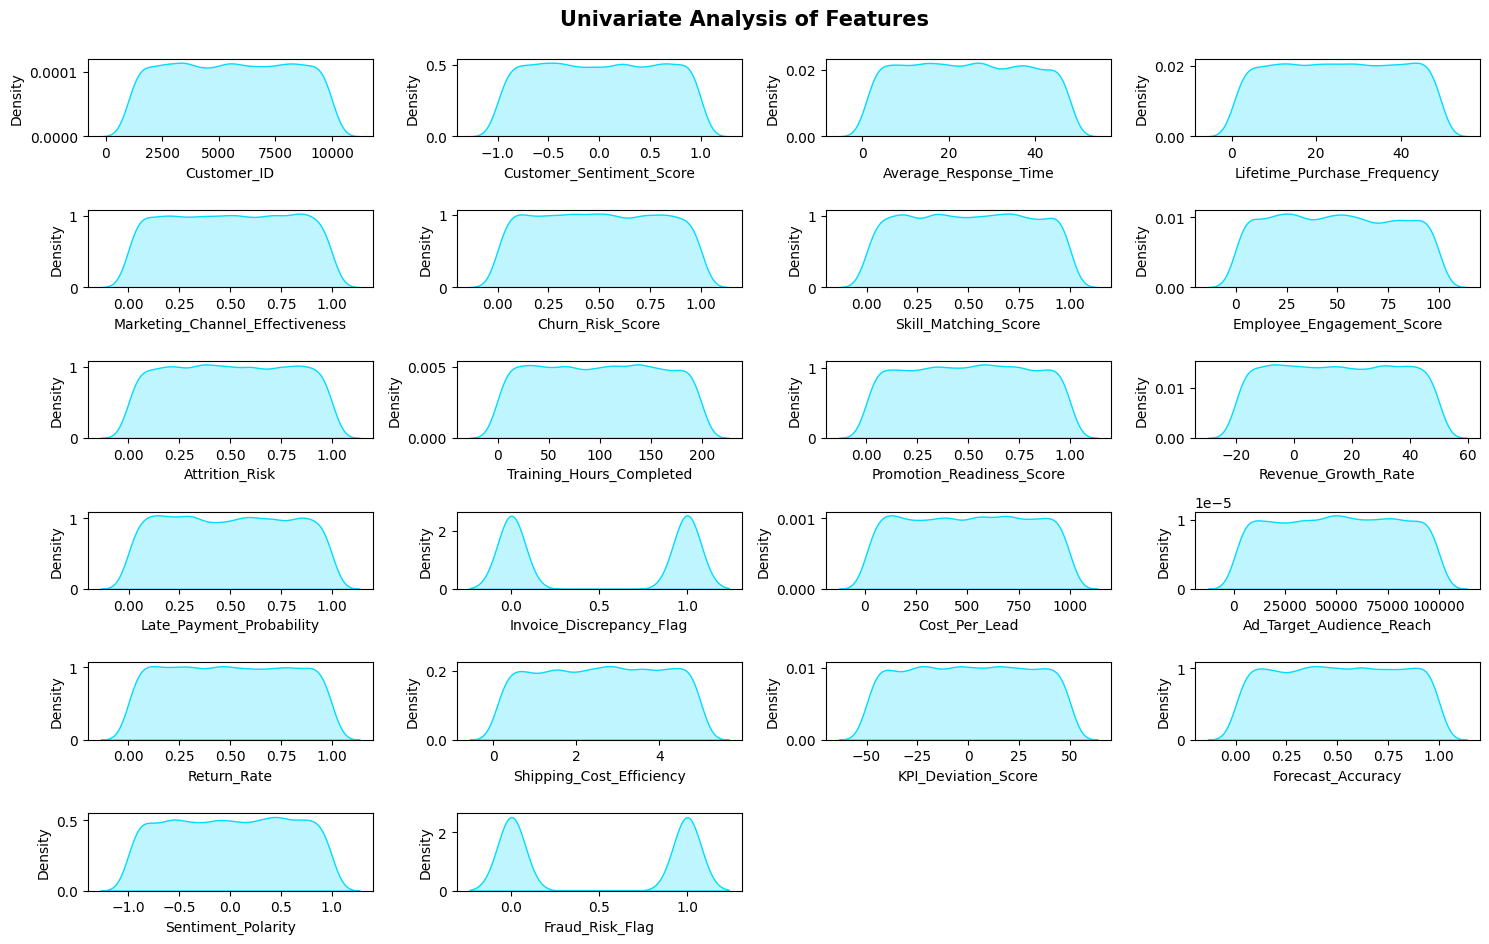

In [14]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df[num_features[i]],shade=True,color='#00DBFF')
    plt.tight_layout()

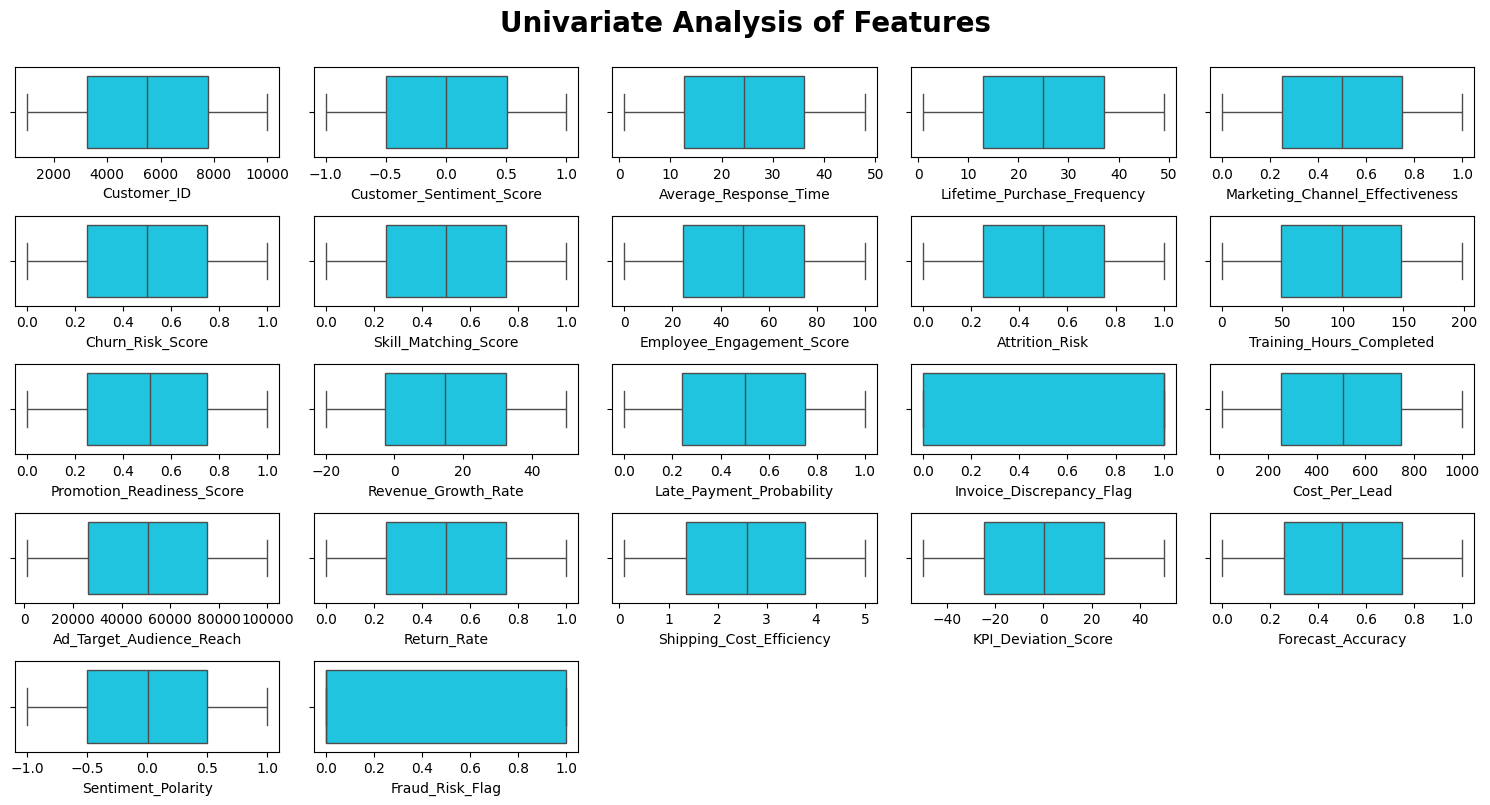

In [15]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=20,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,5,i+1)
    sns.boxplot(data=df,x=num_features[i],color='#00DBFF')
    plt.xlabel(num_features[i])
    plt.tight_layout()

In [ ]:
cat_features = df.select_dtypes(include='object').dtypes.index

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(cat_features)):
    plt.subplot(10,4,i+1)
    sns.countplot(x=df[cat_features[i]],color='#00DBFF')
    plt.tight_layout()

### Machine Learning Approach

In [16]:
# Churn Prediction 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
# Define target and features
target = "Churn_Risk_Score"
df["Churn_Label"] = (df[target] > 0.5).astype(int)  # Convert score to binary labels (1 = high churn risk)
features = df.select_dtypes(include=[np.number]).drop(columns=[target, "Churn_Label"])

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, df["Churn_Label"], test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report for Churn Prediction:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report for Churn Prediction:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54      1019
           1       0.50      0.43      0.46       981

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000

Accuracy: 0.5065


In [19]:
# Revenue Growth Prediction

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Define target and features
target = "Revenue_Growth_Rate"
features = df.select_dtypes(include=[np.number]).drop(columns=[target])

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Evaluation
print("\nRegression Metrics for Revenue Growth Prediction:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Regression Metrics for Revenue Growth Prediction:
Mean Squared Error: 409.065146079158
R-squared: -0.00461406592275071


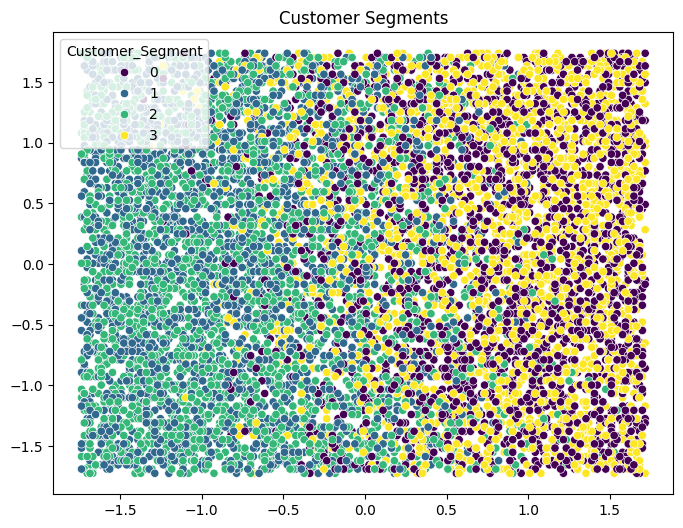

Segment Distribution:
Customer_Segment
2    2572
0    2516
1    2471
3    2441
Name: count, dtype: int64


In [22]:
# Customer Segmentation

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
features = df[["Customer_Sentiment_Score", "Churn_Risk_Score", "Revenue_Growth_Rate", 
               "Attrition_Risk", "Return_Rate"]]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters
df['Customer_Segment'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['Customer_Segment'], palette="viridis")
plt.title("Customer Segments")
plt.show()

print("Segment Distribution:")
print(df['Customer_Segment'].value_counts())

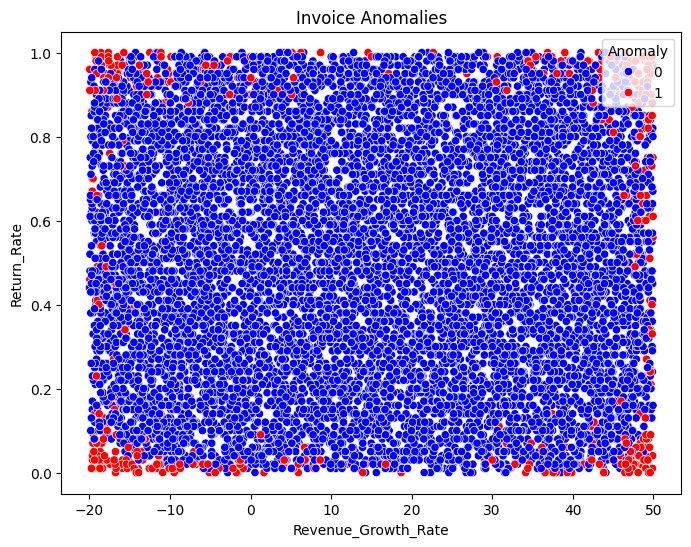

Anomaly Count: 500


In [23]:
# Invoice Anomaly Detection

from sklearn.ensemble import IsolationForest

# Define features for anomaly detection
features = df[["Revenue_Growth_Rate", "Invoice_Discrepancy_Flag", "Return_Rate", "Attrition_Risk"]]

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(features)

# Mark anomalies
df['Anomaly'] = df['Anomaly_Score'].apply(lambda x: 1 if x == -1 else 0)

# Visualize anomalies
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Revenue_Growth_Rate'], y=df['Return_Rate'], hue=df['Anomaly'], palette={0: 'blue', 1: 'red'})
plt.title("Invoice Anomalies")
plt.show()

print("Anomaly Count:", df['Anomaly'].sum())

In [24]:
# Attrition Risk Prediction

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [25]:
# Target and features
df['High_Attrition_Risk'] = (df['Attrition_Risk'] > 0.5).astype(int)
features = df[["Customer_Sentiment_Score", "Revenue_Growth_Rate", "Return_Rate"]]
target = df['High_Attrition_Risk']

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[637 378]
 [580 405]]
Accuracy Score: 0.521


In [27]:
# Return Rate Prediction

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [28]:
# Target and features
target = "Return_Rate"
features = df[["Customer_Sentiment_Score", "Revenue_Growth_Rate", "Attrition_Risk"]]

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.24450984593355332


In [30]:
# Preferred Communication Channel Prediction (Multi-Class Classification)

from sklearn.tree import DecisionTreeClassifier

In [31]:
# Encode categorical target
df['Channel_Label'] = df['Preferred_Communication_Channel'].astype('category').cat.codes

# Define features and target
features = df[["Customer_Sentiment_Score", "Revenue_Growth_Rate", "Attrition_Risk"]]
target = df['Channel_Label']

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation
print("\nDecision Tree Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.02      0.05       506
           1       0.24      0.32      0.27       488
           2       0.13      0.01      0.03       501
           3       0.26      0.65      0.37       505

    accuracy                           0.25      2000
   macro avg       0.27      0.25      0.18      2000
weighted avg       0.27      0.25      0.18      2000



In [33]:
# Load Dataset
file_path_2 = 'zoho_management_service_dataset_v2.csv'
df_2 = pd.read_csv(file_path_2)
pd.set_option('display.max_columns',60)
print(df_2.shape)

(10000, 56)


In [38]:
df_2.head()

,Unnamed: 0,Customer_ID,Customer_Sentiment_Score,Customer_Tier,Average_Response_Time,Lifetime_Purchase_Frequency,Marketing_Channel_Effectiveness,Churn_Risk_Score,Preferred_Communication_Channel,Skill_Matching_Score,Employee_Engagement_Score,Attrition_Risk,Training_Hours_Completed,Promotion_Readiness_Score,Diversity_Index,Job_Fit_Score,Revenue_Growth_Rate,Late_Payment_Probability,Invoice_Discrepancy_Flag,Expense_Category,ROI_Per_Expense,Credit_Risk_Score,Profit_Margin,Root_Cause_Category,Customer_Priority_Level,Agent_Productivity_Score,Escalation_Count,Issue_Complexity_Score,Proactive_Resolution_Flag,Downtime_Affecting_Flag,Lead_Engagement_Score,Cost_Per_Lead,Customer_Referral_Count,Sentiment_Trend,Ad_Target_Audience_Reach,Social_Influence_Score,Campaign_Seasonality_Flag,Predicted_Stockout_Date,Return_Rate,Cross_Sell_Opportunities,Warehouse_Processing_Time,Fulfillment_Center_Utilization,Shipping_Cost_Efficiency,Demand_Volatility,KPI_Deviation_Score,Forecast_Accuracy,Data_Anomaly_Count,Customer_Lifetime_Value_Change,Operational_Efficiency_Score,Predictive_Maintenance_Score,Interaction_Complexity,Geo_Cluster,Sentiment_Polarity,Fraud_Risk_Flag,Engagement_Variability,Customer_Journey_Stage
0,0,1,0.374540,Silver,52.829880,13,0.456660,0.676368,Social Media,0.111134,0.123638,0.083265,126,0.336337,0.716675,0.615642,0.618445,0.656437,1,Operations,3.005398,0.410366,0.169589,Software,High,0.984878,6,0.640509,0,0,0.545605,86.037643,5,Neutral,94979,0.331014,1,2024-01-01,0.520459,3,28.407062,0.411840,2.032575,0.044393,3.624383,0.273141,13,1348.480342,0.828826,0.963164,0.910945,North,-0.679848,0,0.837310,Retention
1,1,2,0.950714,Silver,14.100352,27,0.773253,0.380695,Email,0.628109,0.903416,0.780842,104,0.057547,0.476530,0.932547,0.652087,0.051755,0,Marketing,0.108725,0.112232,0.337387,Software,Medium,0.542066,2,0.165810,0,1,0.772470,206.831181,10,Negative,47246,0.980055,1,2024-01-02,0.988679,0,71.218854,0.987498,3.375977,0.706025,3.514795,0.530980,13,2542.533412,0.834454,0.300204,0.698977,East,-0.820447,0,0.977251,Consideration
2,2,3,0.731994,Gold,25.611418,38,0.208186,0.785966,Phone,0.948059,0.611727,0.389925,12,0.898199,0.428040,0.901489,-0.323526,0.073291,1,Travel,1.110752,0.087024,0.204586,Hardware,High,0.644858,4,0.823576,1,0,0.132520,232.766904,17,Positive,42613,0.629010,0,2024-01-03,0.306420,8,50.022749,0.428189,3.748169,0.703124,2.486360,0.767830,18,1577.445552,0.917555,0.366927,0.235723,West,-0.607513,0,0.133678,Retention
3,3,4,0.598658,Silver,48.092925,33,0.599799,0.702865,Phone,0.453880,0.863513,0.444020,163,0.240260,0.746317,0.918720,0.634869,0.974820,1,Marketing,0.125882,0.453599,0.113325,Hardware,High,0.817118,8,0.981533,0,0,0.937222,570.711105,2,Positive,37641,0.671469,1,2024-01-04,0.594273,7,11.080736,0.281003,3.648907,0.232779,0.017211,0.048892,0,3145.340791,0.699729,0.687196,0.819033,East,-0.520258,1,0.072271,Awareness
4,4,5,0.156019,Silver,35.228343,6,0.532998,0.687553,Social Media,0.454231,0.820361,0.374479,53,0.523275,0.416470,0.989258,0.772342,0.867594,1,Operations,0.749438,0.397890,0.243985,Hardware,Low,0.531163,1,0.512201,0,1,0.439732,48.076988,15,Negative,21910,0.838186,0,2024-01-05,0.258790,6,30.464416,0.793363,2.060671,0.932798,4.017348,0.141213,5,1601.948893,0.914794,0.916120,0.758428,East,0.190942,1,0.387745,Retention


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error

# 1. CRM: Churn Prediction
# Convert Churn_Risk_Score to binary labels
df_2['Churn_Label'] = np.where(df_2['Churn_Risk_Score'] > df_2['Churn_Risk_Score'].median(), 'High', 'Low')
le = LabelEncoder()
df_2['Churn_Label'] = le.fit_transform(df_2['Churn_Label'])

X_crm = df_2[['Customer_Sentiment_Score', 'Lifetime_Purchase_Frequency', 'Marketing_Channel_Effectiveness']]
y_crm = df_2['Churn_Label']
X_train_crm, X_test_crm, y_train_crm, y_test_crm = train_test_split(X_crm, y_crm, test_size=0.2, random_state=42)

rf_crm = RandomForestClassifier(random_state=42)
rf_crm.fit(X_train_crm, y_train_crm)
crm_predictions = rf_crm.predict(X_test_crm)
print("CRM Churn Prediction Accuracy:", accuracy_score(y_test_crm, crm_predictions))

# 2. HR: Attrition Prediction
# Convert Attrition_Risk to binary labels
df_2['Attrition_Label'] = np.where(df_2['Attrition_Risk'] > df_2['Attrition_Risk'].median(), 'High', 'Low')
df_2['Attrition_Label'] = le.fit_transform(df_2['Attrition_Label'])

X_hr = df_2[['Skill_Matching_Score', 'Employee_Engagement_Score', 'Training_Hours_Completed']]
y_hr = df_2['Attrition_Label']
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_hr, y_hr, test_size=0.2, random_state=42)

rf_hr = RandomForestClassifier(random_state=42)
rf_hr.fit(X_train_hr, y_train_hr)
hr_predictions = rf_hr.predict(X_test_hr)
print("HR Attrition Prediction Accuracy:", accuracy_score(y_test_hr, hr_predictions))

# 3. Finance: Late Payment Probability
# Convert Late_Payment_Probability to binary labels
df_2['Late_Payment_Label'] = np.where(df_2['Late_Payment_Probability'] > df_2['Late_Payment_Probability'].median(), 'High', 'Low')
df_2['Late_Payment_Label'] = le.fit_transform(df_2['Late_Payment_Label'])

X_finance = df_2[['Credit_Risk_Score', 'Profit_Margin', 'Revenue_Growth_Rate']]
y_finance = df_2['Late_Payment_Label']
X_train_finance, X_test_finance, y_train_finance, y_test_finance = train_test_split(X_finance, y_finance, test_size=0.2, random_state=42)

rf_finance = RandomForestClassifier(random_state=42)
rf_finance.fit(X_train_finance, y_train_finance)
finance_predictions = rf_finance.predict(X_test_finance)
print("Finance Late Payment Prediction Accuracy:", accuracy_score(y_test_finance, finance_predictions))

# 4. Marketing: Lead Engagement Prediction
X_marketing = df_2[['Cost_Per_Lead', 'Ad_Target_Audience_Reach', 'Social_Influence_Score']]
y_marketing = df_2['Lead_Engagement_Score']
X_train_marketing, X_test_marketing, y_train_marketing, y_test_marketing = train_test_split(X_marketing, y_marketing, test_size=0.2, random_state=42)

rf_marketing = RandomForestRegressor(random_state=42)
rf_marketing.fit(X_train_marketing, y_train_marketing)
marketing_predictions = rf_marketing.predict(X_test_marketing)
print("Marketing Lead Engagement Prediction RMSE:", np.sqrt(mean_squared_error(y_test_marketing, marketing_predictions)))

# 5. E-commerce: Return Rate Prediction
X_ecommerce = df_2[['Fulfillment_Center_Utilization', 'Shipping_Cost_Efficiency', 'Demand_Volatility']]
y_ecommerce = df_2['Return_Rate']
X_train_ecommerce, X_test_ecommerce, y_train_ecommerce, y_test_ecommerce = train_test_split(X_ecommerce, y_ecommerce, test_size=0.2, random_state=42)

rf_ecommerce = RandomForestRegressor(random_state=42)
rf_ecommerce.fit(X_train_ecommerce, y_train_ecommerce)
ecommerce_predictions = rf_ecommerce.predict(X_test_ecommerce)
print("E-commerce Return Rate Prediction RMSE:", np.sqrt(mean_squared_error(y_test_ecommerce, ecommerce_predictions)))

# 6. Clustering: Customer Segmentation
X_clustering = df_2[['Customer_Sentiment_Score', 'Lifetime_Purchase_Frequency', 'Marketing_Channel_Effectiveness']]
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_clustering_scaled)
df_2['Customer_Cluster'] = kmeans.labels_
print("Customer Clustering Completed. Cluster Labels Assigned.")

CRM Churn Prediction Accuracy: 0.493
HR Attrition Prediction Accuracy: 0.4945
Finance Late Payment Prediction Accuracy: 0.5135
Marketing Lead Engagement Prediction RMSE: 0.30594337463643273
E-commerce Return Rate Prediction RMSE: 0.303070742084735
Customer Clustering Completed. Cluster Labels Assigned.


In [ ]:
# Thank You!
# More Advance Working Sonn..!
# Notebook Project By : PRASAD JADHAV (ML-ENG)
# LinkedIn: linkedin.com/in/prasadmjadhav2 | Github: github.com/prasadmjadhav2 | Mail: prasadmjadhav6161@gmail.com